# Analyzing the Food Insulin Index and macro-nutrient data of foods
The objective of this notebook is to perform exploratory data analysis on a dataset containing macro-nutrients and insulin index of over a hundred foods.

**Data source**: "Kirstine Bell, Clinical Application of the Food Insulin Index to Diabetes Mellitus", PhD thesis from the UNiversity of Sydney, 2014

** Notebook structure:** 
1. Initialization
2. Correlation
3. Scatter plots
4. Insulin Index distribution
5. Conclusions




# 1. Initialization

In [99]:
#Importing modules
import pandas as pd
import plotly as py
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

#Enabling offline ploting 
py.offline.init_notebook_mode(connected=True)
%matplotlib inline

#Reading csv file and minor formating steps
file = "All_data_KJ_Thesis.xlsx"
df = pd.read_excel(file)
df.set_index("Food")
df.iat[4,2]=2000
df["Test Date"] = df["Test Date"].astype("int64")
df.drop(df.columns[[13,14]], axis=1, inplace=True)

### First thoughts on the data set
We can breakdown the dataset and its columns into three main types of data:
* **Contextual information**: such as the name of the food, its category and test date (*columns "Category", "Food", "Test Date")*
* **Macro-nutrient data**: which comes directly from the foods *before ingestion*. (*columns "Weight" -> "Fibre"*)  (normalized to the same units) 
* **Metabolic response data**: the body's response to ingesting the foods (*columns 'GI', 'GL', 'GS', 'FII'*)

We are interested here in the relationship between these three main types. For example: how does the insulin index vary according to foods and categories ? Are the patterns and exceptions of interest ? What is the correlation between macro-nutrients and metabolic response. What are the main differences in metabolic responses ? etc...

* AvCHO = Carbohydrates
* GI = Glycaemic Index
* GL = Glycaemic Load
* GS = Glucemic Score
* FII = Food Insulin Index

In [101]:
#Print the dataset
df

,Category,Food,Test Date,Weight (g/MJ),Protein (g/MJ),Fat (g/MJ),AvCHO (g/MJ),Sugar (g/MJ),Fibre (g/MJ),GI (%),GL (g/MJ),GS (%),FII (%)
0,Glucose,Glucose (Glucodin Energy Powder),2005,59,0,0,59,59,0,100,59,100,100
1,Dairy Products,Cream cheese (Coles),2003,68,6,24,3,2,0,0,0,4,18
2,Dairy Products,93% Fat-free cheddar cheese (Dairy Farmers),2003,119,41,8,1,1,0,0,0,6,20
3,Dairy Products,Full cream milk (Dairy Farmers),1999,368,11,14,17,17,0,31,5,12,24
4,Dairy Products,Cheddar cheese (Coles),2000,59,15,21,0,0,0,0,0,39,33
5,Dairy Products,1% Fat milk (Dairy Farmers),2005,558,20,6,27,27,0,29,8,16,34
6,Dairy Products,Reduced-fat cottage cheese (Dairy Farmers),2006,234,29,10,7,7,0,10,1,9,40
7,Dairy Products,Low-fat processed cheese slice (Kraft Foods Ltd),2003,154,36,4,15,15,0,10,2,14,42
8,Dairy Products,Low-fat cottage cheese (Bulla Dairy Foods),2007,264,30,6,16,14,0,10,2,4,52
9,Dairy Products,Skim milk (Dairy Farmers),2001,690,25,1,33,33,0,29,9,25,60


# 2. Correlation
In this section we focus on the *correlation* between different features (i.e. the columns) to highlight trends, points of interest and next steps.

Keeping in mind one objective is to identify the features which could be used to build a linear regression model for the Insulin Index. 

In [114]:
#Remove non numerical columns and create a new dataframe d (for the correlation calculation)
d = df.iloc[:,3:13].copy()

# Compute the correlation matrix
corr = d.corr()

#Hide the upper diagonal matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

#Show the matrix
corr.where(mask)

,Weight (g/MJ),Protein (g/MJ),Fat (g/MJ),AvCHO (g/MJ),Sugar (g/MJ),Fibre (g/MJ),GI (%),GL (g/MJ),GS (%),FII (%)
Weight (g/MJ),1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protein (g/MJ),0.044485,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fat (g/MJ),-0.382426,0.063056,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AvCHO (g/MJ),0.191483,-0.556563,-0.735497,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Sugar (g/MJ),0.526688,-0.372293,-0.440350,0.613197,1.000000,NaN,NaN,NaN,NaN,NaN
Fibre (g/MJ),0.137616,-0.083404,-0.245248,0.270281,-0.003291,1.000000,NaN,NaN,NaN,NaN
GI (%),-0.074353,-0.564108,-0.534135,0.809765,0.271049,0.166906,1.000000,NaN,NaN,NaN
GL (g/MJ),0.012468,-0.522368,-0.667266,0.901129,0.427376,0.144167,0.906808,1.000000,NaN,NaN
GS (%),-0.003632,-0.453247,-0.613998,0.810070,0.310643,0.166660,0.864134,0.913944,1.000000,NaN
FII (%),0.042015,-0.269393,-0.555128,0.703983,0.375033,0.040840,0.747438,0.775389,0.862536,1.0


## Interpreting the correlation

### Which features have the most impact on the result of interest? i.e. Food Insulin Index (FII) 

**Correlation between Macro-nutrients and FII:**
1. AvCHO (i.e. Carbohydrates) = 0,70
2. Fat = -0.55
3. Sugar = 0.38
4. Protein = -0.27

**Correlation between Metabolic responses and FII:**
1. Glucose Scoe = 0.86
2. Glycaemic Level = 0.76
3. Glycaemic INdex = 0.74



### Which features are correlated between each other ? 

*This could imply that they are not independent from each other, and could harm the linear regression model (see multicollinearity https://en.wikipedia.org/wiki/Multicollinearity )*
 
**Correlation between macro-nutrient features:**
1. AvCHO vs Fat = -0.74
2. Sugar vs AvCHO = 0.61
3. AvCHO vs Protein = -0.55

**Correlation between metabolic response features:**
1. GS vs GL = 0.91
2. GL vs GI = 0.90
3. GS vs GI = 0.86







## Visualizing the correlation matrix as a heatmap

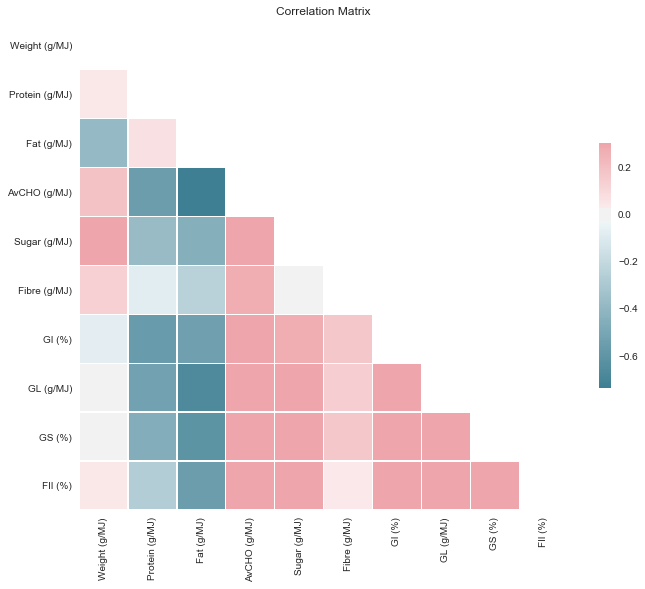

In [115]:
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
ax.set(title="Correlation Matrix")


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#f.savefig('correlation_matrix.png')


# 3. Scatter plots
This section builds upon the correlation matrix to focus on scatter plots of interest.

Recall that 

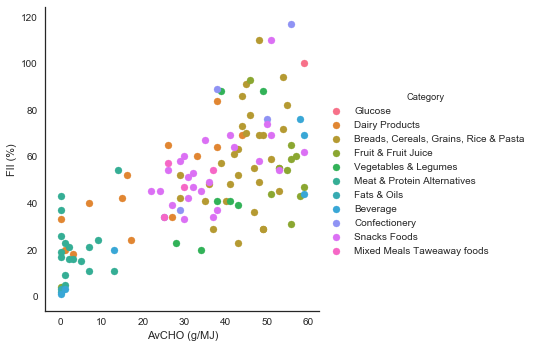

In [118]:
d1 = df.copy()
d1.drop(["Test Date","Food"], axis=1, inplace=True)
sns.FacetGrid(d1, hue="Category", size=5).map(plt.scatter, "AvCHO (g/MJ)", "FII (%)").add_legend();
plt.show();

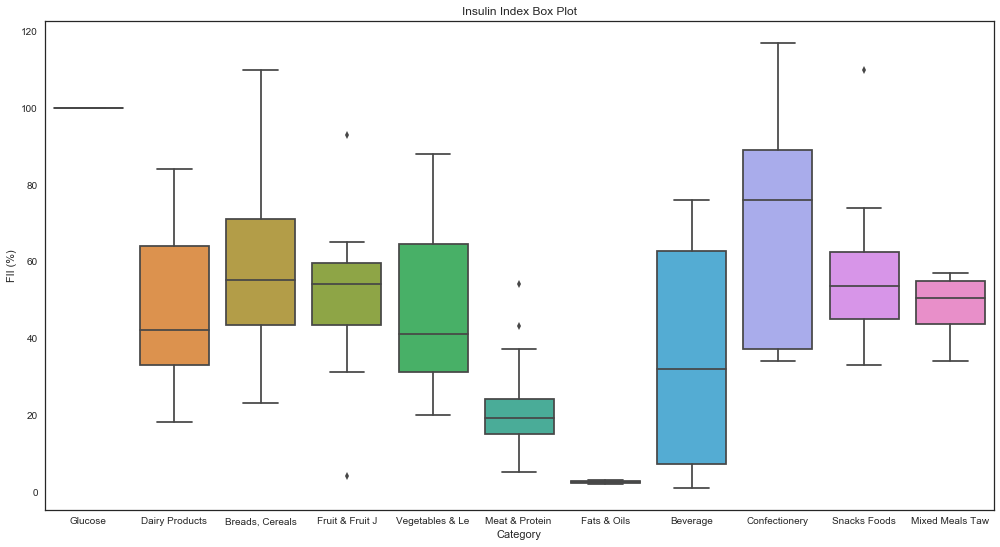

In [89]:
f, ax = plt.subplots(figsize=(17, 9))
ax.set(title="Insulin Index Box Plot")
sns.boxplot(x="Category",y="FII (%)", data=d1)
plt.show()
#f.savefig('box_plot.png')

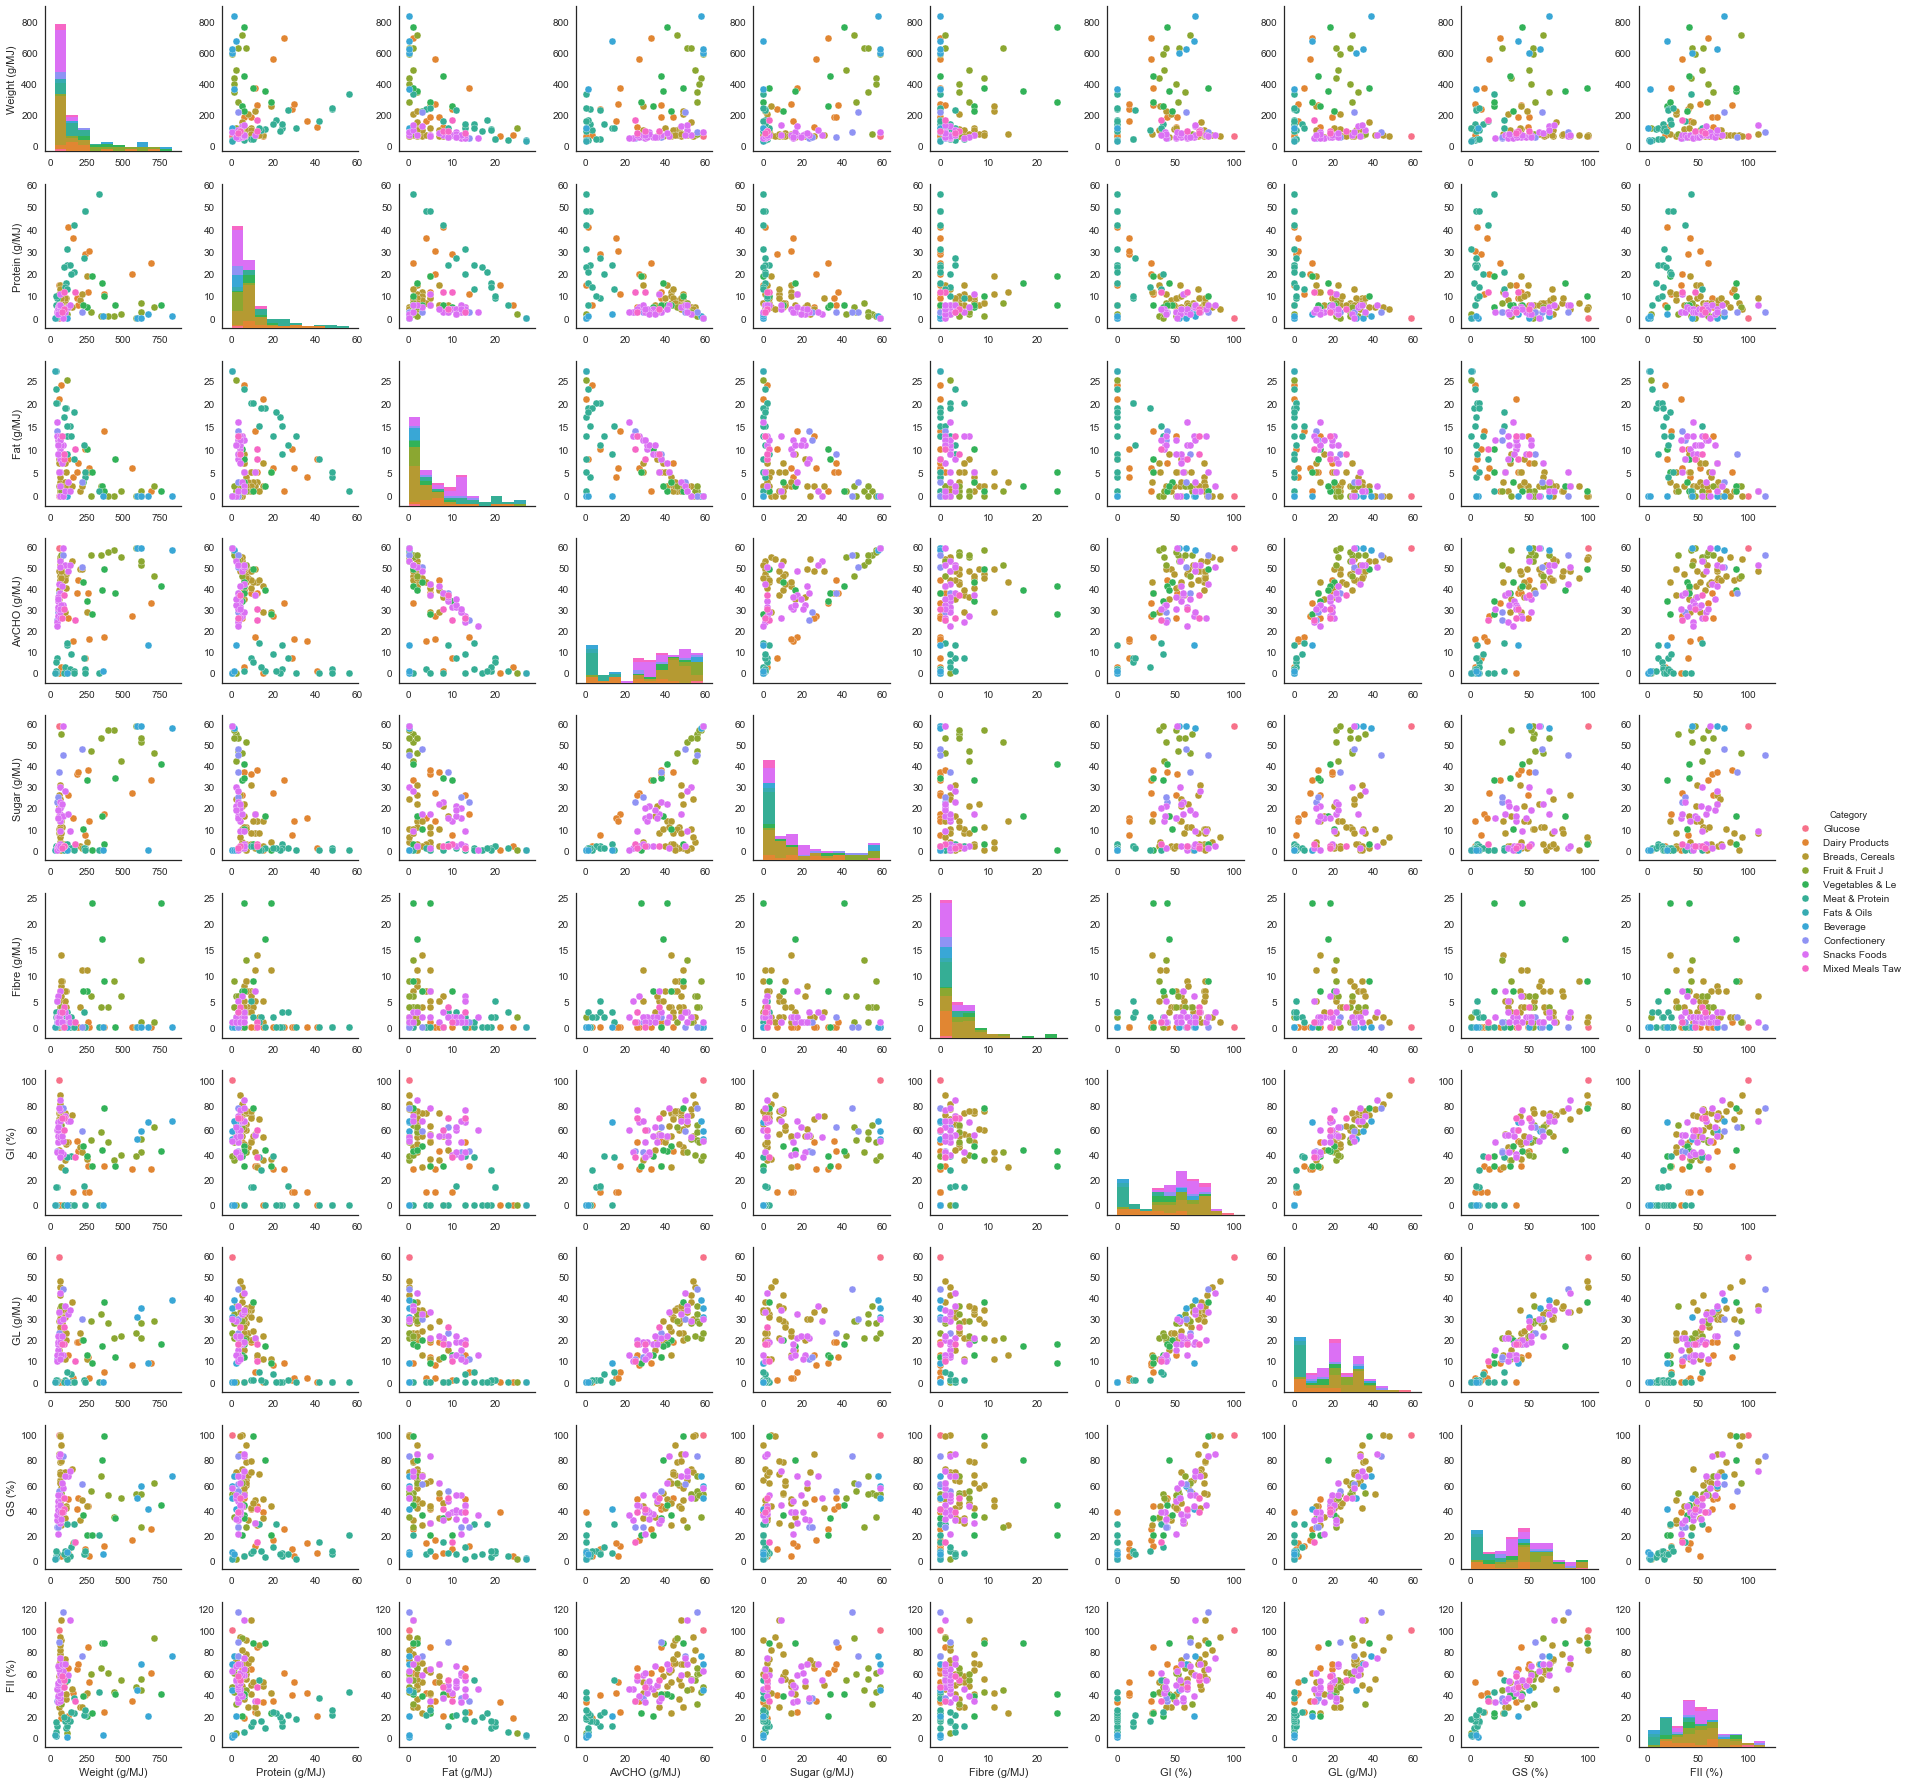

In [90]:
pair_plot = sns.pairplot(d1, hue = "Category")
plt.show()
#Code to save the pair plot
#fig = pair_plot.fig
#fig.savefig("test.png") 

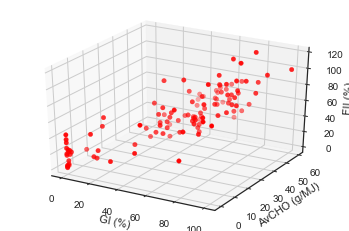

In [91]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

x=d1["GI (%)"]
y=d1["AvCHO (g/MJ)"]
z=d1["FII (%)"]

#color=("Iris-setosa", "Iris-virginica", "Iris-versicolor")
#color=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
ax.scatter(x,y,z,c='r',marker='o');

ax.set_xlabel("GI (%)")
ax.set_ylabel("AvCHO (g/MJ)")
ax.set_zlabel("FII (%)")

plt.show()
#Code to save the pair plot
fig.savefig("3D.png")

In [92]:
df_temp = df[["Food","FII (%)"]].set_index("Food")
df_FII = df_temp['FII (%)']
df_FII = df_FII.sort_values(ascending=True)

#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
cf.go_offline()
fig = df_FII.iplot(kind='bar')

#https://dev.socrata.com/blog/2016/02/02/plotly-pandas.html

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
